[![image](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/giswqs/geog-312/blob/master/labs/lab_09.ipynb)
[![image](https://binder.pangeo.io/badge_logo.svg)](https://gishub.org/geog312-pangeo)

**Cameron Corsino**

In [1]:
from datetime import datetime

now = datetime.now()
print(f"Submitted time: {now}")

Submitted time: 2023-11-27 15:02:20.139283


## Question 1

Create a map for any state (except Tennessee) with the county boundary as the background and place names as a marker cluster. See the demo below.

You can download county boundary data and place names from [USDA Geospatial Data Gateway](https://datagateway.nrcs.usda.gov/). On the right sidebar menu of the page, click [Order by State](https://datagateway.nrcs.usda.gov/GDGOrder.aspx?order=QuickState). Select a state (except Tennessee) and download the county boundary and place names. Then you can write code to create an interactive map like the demo shown below.

Submit a link to the HTML file, which must include a GIF demo, just like the demo you see on this page.

Steps to insert to a Jupyter notebook:
- Create a GIF of the map
- Upload the GIF to https://imgur.com
- Get a link to the uploaded GIF, such as https://i.imgur.com/Xb6bTIR.gif
- Create a markdown cell in Jupyter notebook
- Insert the link to the markdown cell, such as `![](https://i.imgur.com/Xb6bTIR.gif)`
- Export the notebook as an HTML file

![](https://i.imgur.com/icP9Kws.png)

![](https://i.imgur.com/Xb6bTIR.gif)

**I struggled with this one, this is all I was able to get to work.**

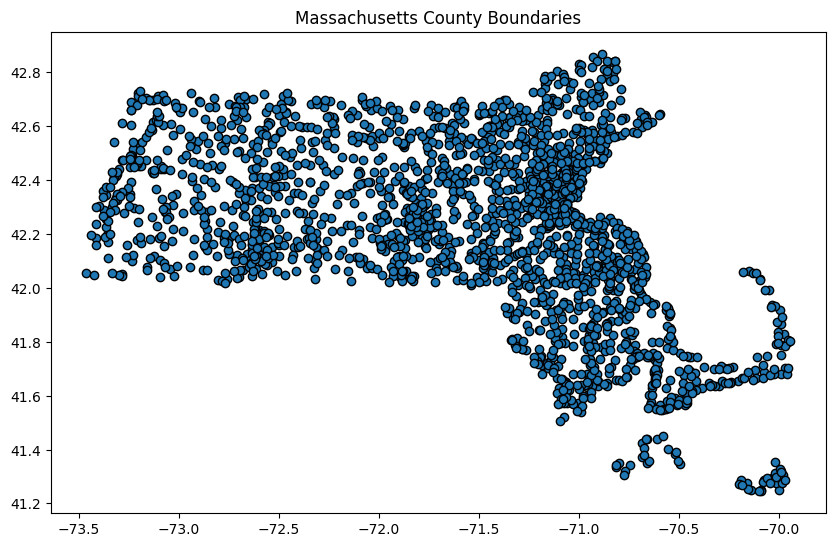

In [109]:
import geopandas as gpd
import matplotlib.pyplot as plt

massachusetts_counties = gpd.read_file('/gnispop_p_ma.shp')

massachusetts_counties.plot(figsize=(10, 10), edgecolor='black')

plt.title('Massachusetts County Boundaries')

plt.show()
place_names_data = {'PlaceName': ['Boston', 'Worcester', 'Springfield'],
                    'Latitude': [42.3601, 42.2626, 42.1015],
                    'Longitude': [-71.0589, -71.8023, -72.5898]}
place_names_df = gpd.GeoDataFrame(place_names_data, geometry=gpd.points_from_xy(place_names_data['Longitude'], place_names_data['Latitude']))

ma_map = folium.Map(location=[42.373611, -71.109733], zoom_start=8)

folium.GeoJson(massachusetts_counties).add_to(ma_map)

marker_cluster = MarkerCluster().add_to(ma_map)

for idx, row in place_names_df.iterrows():
    folium.Marker([row['Latitude'], row['Longitude']], popup=row['PlaceName']).add_to(marker_cluster)

ma_map.save('massachusetts_map.html')

In [3]:
import os
import subprocess
import sys

In [4]:
import warnings
warnings.filterwarnings("ignore")

In [5]:
def install(package):
    subprocess.check_call([sys.executable, "-m", "pip", "install", package])

In [6]:
pkgs = ['leafmap', 'geopandas', 'keplergl', 'datapane', 'xarray_leaflet', 'osmnx', 'pygeos', 'imageio', 'tifffile']
if "google.colab" in sys.modules:
    for pkg in pkgs:
        install(pkg)

In [7]:
try:
    import leafmap
except ImportError:
    install('leafmap')

In [8]:
import leafmap

m = leafmap.Map()
m

Map(center=[20, 0], controls=(ZoomControl(options=['position', 'zoom_in_text', 'zoom_in_title', 'zoom_out_text…

In [9]:
import leafmap.foliumap as leafmap

m = leafmap.Map()
m

In [10]:
import leafmap.kepler as leafmap

m = leafmap.Map()
m

Map(config={'version': 'v1', 'config': {'mapState': {'latitude': 20, 'longitude': 0, 'zoom': 1.3, 'bearing': 0…

In [13]:
import leafmap

In [18]:
m = leafmap.Map(center=(40, -100), zoom=4) #center=[lat, lon]
m

Map(center=[40, -100], controls=(ZoomControl(options=['position', 'zoom_in_text', 'zoom_in_title', 'zoom_out_t…

In [92]:
m = leafmap.Map(center=(42.4, -71), zoom=8)
m

Map(center=[42.4, -71], controls=(ZoomControl(options=['position', 'zoom_in_text', 'zoom_in_title', 'zoom_out_…

In [19]:
m = leafmap.Map(height="400px", width="800px")
m

Map(center=[20, 0], controls=(ZoomControl(options=['position', 'zoom_in_text', 'zoom_in_title', 'zoom_out_text…

In [20]:
m = leafmap.Map(draw_control=False, measure_control=False, fullscreen_control=False, attribution_control=False)
m

Map(center=[20, 0], controls=(ZoomControl(options=['position', 'zoom_in_text', 'zoom_in_title', 'zoom_out_text…

In [21]:
m = leafmap.Map()
m.clear_controls()
m

Map(center=[20, 0], crs={'name': 'EPSG3857', 'custom': False}, default_style=MapStyle(), dragging_style=MapSty…

In [22]:
import leafmap

In [23]:
m = leafmap.Map(google_map="TERRAIN")  # HYBIRD, ROADMAP, SATELLITE, TERRAIN
m

Map(center=[20, 0], controls=(ZoomControl(options=['position', 'zoom_in_text', 'zoom_in_title', 'zoom_out_text…

In [24]:
m = leafmap.Map()
m.add_basemap("Esri.NatGeoWorldMap")
m

Map(center=[20, 0], controls=(ZoomControl(options=['position', 'zoom_in_text', 'zoom_in_title', 'zoom_out_text…

In [26]:
m = leafmap.Map()
m.add_tile_layer(url="https://mt1.google.com/vt/lyrs=y&x={x}&y={y}&z={z}", name="Google Satellite", attribution="Google")
m

Map(center=[20, 0], controls=(ZoomControl(options=['position', 'zoom_in_text', 'zoom_in_title', 'zoom_out_text…

In [27]:
m = leafmap.Map()
naip_url = 'https://services.nationalmap.gov/arcgis/services/USGSNAIPImagery/ImageServer/WMSServer?'
m.add_wms_layer(url=naip_url, layers='0', name='NAIP Imagery', format='image/png', shown=True)
m

Map(center=[20, 0], controls=(ZoomControl(options=['position', 'zoom_in_text', 'zoom_in_title', 'zoom_out_text…

In [30]:
legends = leafmap.builtin_legends
for legend in legends:
    print(legend)

NLCD
NWI
MODIS/051/MCD12Q1
GLOBCOVER
JAXA/PALSAR
MODIS/006/MCD12Q1
Oxford
AAFC/ACI
COPERNICUS/CORINE/V20/100m
COPERNICUS/Landcover/100m/Proba-V/Global
USDA/NASS/CDL
ESA_WorldCover


In [31]:
m = leafmap.Map()
url = "https://www.mrlc.gov/geoserver/mrlc_display/NLCD_2019_Land_Cover_L48/wms?"
m.add_wms_layer(url, layers="NLCD_2019_Land_Cover_L48", name="NLCD 2019 CONUS Land Cover",format="image/png", transparent=True)
m.add_legend(builtin_legend='NLCD')
m

Map(center=[20, 0], controls=(ZoomControl(options=['position', 'zoom_in_text', 'zoom_in_title', 'zoom_out_text…

In [32]:
m = leafmap.Map(google_map="HYBRID")

url1 = "https://www.fws.gov/wetlands/arcgis/services/Wetlands/MapServer/WMSServer?"
m.add_wms_layer(url1, layers="1",format='image/png', transparent=True, name="NWI Wetlands Vector")

url2 = "https://www.fws.gov/wetlands/arcgis/services/Wetlands_Raster/ImageServer/WMSServer?"
m.add_wms_layer(url2, layers="0",format='image/png', transparent=True, name="NWI Wetlands Raster")

m.add_legend(builtin_legend="NWI")
m

Map(center=[20, 0], controls=(ZoomControl(options=['position', 'zoom_in_text', 'zoom_in_title', 'zoom_out_text…

In [33]:
m = leafmap.Map()

labels = ['One', 'Two', 'Three', 'Four', 'ect']
 #color can be defined using either hex code or RGB (0-255, 0-255, 0-255)
colors = ['#8DD3C7', '#FFFFB3', '#BEBADA', '#FB8072', '#80B1D3']
# colors = [(255, 0, 0), (127, 255, 0), (127, 18, 25), (36, 70, 180), (96, 68, 123)]

m.add_legend(title='Legend', labels=labels, colors=colors)
m

Map(center=[20, 0], controls=(ZoomControl(options=['position', 'zoom_in_text', 'zoom_in_title', 'zoom_out_text…

In [34]:
m = leafmap.Map()

url = "https://www.mrlc.gov/geoserver/mrlc_display/NLCD_2019_Land_Cover_L48/wms?"
m.add_wms_layer(url, layers="NLCD_2019_Land_Cover_L48", name="NLCD 2019 CONUS Land Cover", format="image/png", transparent=True)

legend_dict = {
    '11 Open Water': '466b9f',
    '12 Perennial Ice/Snow': 'd1def8',
    '21 Developed, Open Space': 'dec5c5',
    '22 Developed, Low Intensity': 'd99282',
    '23 Developed, Medium Intensity': 'eb0000',
    '24 Developed High Intensity': 'ab0000',
    '31 Barren Land (Rock/Sand/Clay)': 'b3ac9f',
    '41 Deciduous Forest': '68ab5f',
    '42 Evergreen Forest': '1c5f2c',
    '43 Mixed Forest': 'b5c58f',
    '51 Dwarf Scrub': 'af963c',
    '52 Shrub/Scrub': 'ccb879',
    '71 Grassland/Herbaceous': 'dfdfc2',
    '72 Sedge/Herbaceous': 'd1d182',
    '73 Lichens': 'a3cc51',
    '74 Moss': '82ba9e',
    '81 Pasture/Hay': 'dcd939',
    '82 Cultivated Crops': 'ab6c28',
    '90 Woody Wetlands': 'b8d9eb',
    '95 Emergent Herbaceous Wetlands': '6c9fb8'
}

m.add_legend(legend_title="NLCD Land Cover Classification", legend_dict=legend_dict)
m

Map(center=[20, 0], controls=(ZoomControl(options=['position', 'zoom_in_text', 'zoom_in_title', 'zoom_out_text…

In [35]:
m = leafmap.Map()
m.add_basemap('USGS 3DEP Elevation')
colors = ['006633', 'E5FFCC', '662A00', 'D8D8D8', 'F5F5F5']
m.add_colorbar(colors=colors, vmin=0, vmax=4000)
m

Map(center=[20, 0], controls=(ZoomControl(options=['position', 'zoom_in_text', 'zoom_in_title', 'zoom_out_text…

In [36]:
m = leafmap.Map()

url = "https://elevation.nationalmap.gov/arcgis/services/3DEPElevation/ImageServer/WMSServer?"
m.add_wms_layer(url, layers="3DEPElevation:Hillshade Elevation Tinted", name="USGS 3DEP Elevation", format="image/png", transparent=True)

colors = ['006633', 'E5FFCC', '662A00', 'D8D8D8', 'F5F5F5']
m.add_colorbar(colors=colors, vmin=0, vmax=4000, categorical=True, step=4)
m

Map(center=[20, 0], controls=(ZoomControl(options=['position', 'zoom_in_text', 'zoom_in_title', 'zoom_out_text…

In [37]:
import leafmap
import leafmap.colormaps as cm

In [38]:
cm.palettes.dem

('006633', 'E5FFCC', '662A00', 'D8D8D8', 'F5F5F5')

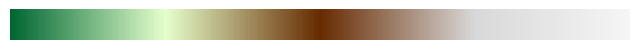

In [39]:
cm.plot_colormap(colors=cm.palettes.dem, axis_off=True)

In [40]:
cm.palettes.ndvi

('FFFFFF',
 'CE7E45',
 'DF923D',
 'F1B555',
 'FCD163',
 '99B718',
 '74A901',
 '66A000',
 '529400',
 '3E8601',
 '207401',
 '056201',
 '004C00',
 '023B01',
 '012E01',
 '011D01',
 '011301')

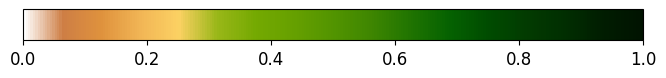

In [41]:
cm.plot_colormap(colors=cm.palettes.ndvi)